In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
SDG = 'SDGs_Zero_Hunger.csv'
data = pd.read_csv(SDG)
data.head()

,IdNegara,NamaNegara,2021,2022,2023,ZeroHungerGoalsScore,Kategori
0,1,Indonesia,31.0,33.5,32.0,37,Sedang
1,2,Malaysia,28.0,29.0,30.0,37,Parah
2,3,Singapura,39.0,39.5,40.0,37,Aman
3,4,Thailand,35.0,36.0,34.5,37,Sedang
4,5,Filipina,25.0,26.5,28.0,37,Parah


In [ ]:
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IdNegara              170 non-null    int64  
 1   NamaNegara            170 non-null    object 
 2   2021                  170 non-null    float64
 3   2022                  170 non-null    float64
 4   2023                  170 non-null    float64
 5   ZeroHungerGoalsScore  170 non-null    int64  
 6   Kategori              170 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 9.4+ KB
None

Missing Values:
 IdNegara                0
NamaNegara              0
2021                    0
2022                    0
2023                    0
ZeroHungerGoalsScore    0
Kategori                0
dtype: int64


In [ ]:
label_encoder = LabelEncoder()
data['Kategori_Encoded'] = label_encoder.fit_transform(data['Kategori'])

In [ ]:
features = ['2021', '2022', '2023', 'ZeroHungerGoalsScore']
X = data[features]
y = data['Kategori_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, predictions, target_names=label_encoder.classes_))


Classification Report:

              precision    recall  f1-score   support

        Aman       1.00      1.00      1.00        11
       Parah       1.00      1.00      1.00         9
      Sedang       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



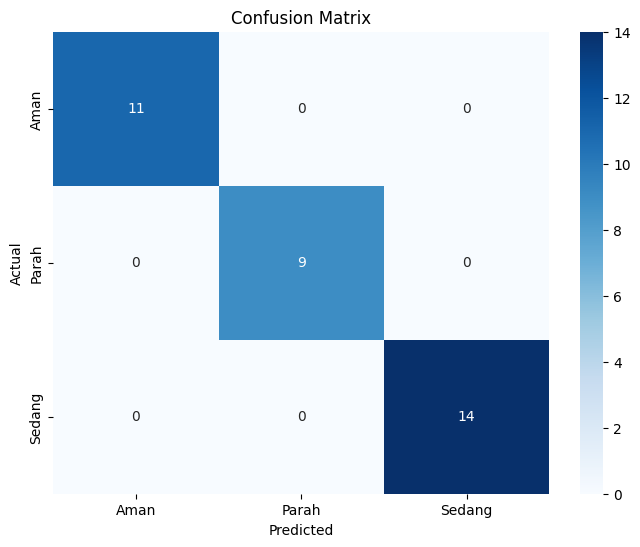

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [133]:
new_data = pd.DataFrame({
    '2021': [35.0],
    '2022': [35.5],
    '2023': [35.0],
    'ZeroHungerGoalsScore': [37]
})
new_prediction = model.predict(new_data)
print("Prediksi Kategori:", label_encoder.inverse_transform(new_prediction))

Prediksi Kategori: ['Sedang']
